## Import and Type Casting

In [1]:
import pandas as pd
pd.set_option("display.max_columns", 40)
import numpy as np
# New import
import matplotlib.pyplot as plt
import datetime

In [2]:
file_name = "data-txn-price-t36.json"
# Change relative file directory to match where the data is
data_path = "../../data/"
data_directory = data_path + file_name
data = pd.read_json(data_directory)
# NOW need this everytime
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'],unit='ms',origin='unix')
data['Filing Date'] = pd.to_datetime(data['Filing Date'])
data['Earliest Transaction Date'] = pd.to_datetime(data['Earliest Transaction Date'])
data['Price'] = pd.to_numeric(data['Price'].str.replace(',','').replace("$",''),errors='coerce') # sets weird values to NA
data['Amount'] = pd.to_numeric(data['Amount'].str.replace(',',''))
data['Amount Owned After'] = pd.to_numeric(data['Amount Owned After'].str.replace(',',''),errors='coerce') # sets weird values to NA

# Returns Columns
data['Ticker 3 Month Returns'] = (data['Ticker Price 3 Months After Txn Date'] - data['Ticker Price At Txn Date']) / data['Ticker Price At Txn Date']
data['Ticker 6 Month Returns'] = (data['Ticker Price 6 Months After Txn Date'] - data['Ticker Price At Txn Date']) / data['Ticker Price At Txn Date']
data['SPY 3 Month Returns'] = (data['SPY Price 3 Months After Txn Date'] - data['SPY Price At Txn Date']) / data['SPY Price At Txn Date']
data['SPY 6 Month Returns'] = (data['SPY Price 6 Months After Txn Date'] - data['SPY Price At Txn Date']) / data['SPY Price At Txn Date']

In [3]:
data.dtypes

Filing Date                             datetime64[ns]
Earliest Transaction Date               datetime64[ns]
Ticker                                          object
Company Name                                    object
Insider Name                                    object
isDirector                                        bool
isOfficer                                         bool
isOwner                                           bool
isOther                                           bool
Title                                           object
Title of Security                               object
Transaction Date                        datetime64[ns]
Transaction Code                                object
Amount                                         float64
Acquired or Disposed                            object
Price                                          float64
Amount Owned After                             float64
Ownership Form                                  object
Nature of 

## 1-liners

In [4]:
'''
Get me the number of unique insiders
'''
data['Insider Name'].unique().shape[0]

11614

In [5]:
'''
Find the right argument to pass to data.describe() that will print out info for all columns
Then, in the space below list out the columns with weird values

Weird Columns = []
'''
data.describe(include='all')

/tmp/ipykernel_656/4222034420.py:7: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')
/tmp/ipykernel_656/4222034420.py:7: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')
/tmp/ipykernel_656/4222034420.py:7: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,Filing Date,Earliest Transaction Date,Ticker,Company Name,Insider Name,isDirector,isOfficer,isOwner,isOther,Title,Title of Security,Transaction Date,Transaction Code,Amount,Acquired or Disposed,Price,Amount Owned After,Ownership Form,Nature of Indirect Ownership,link,Ticker Price At Txn Date,SPY Price At Txn Date,Ticker Price 6 Months After Txn Date,SPY Price 6 Months After Txn Date,Ticker Price 3 Months After Txn Date,SPY Price 3 Months After Txn Date,Ticker 3 Month Returns,Ticker 6 Month Returns,SPY 3 Month Returns,SPY 6 Month Returns
count,64684,64684,64684,64684,64684,64684,64684,64684,64684,64684,64684,49996,64684,4.999600e+04,64684,4.645400e+04,6.461400e+04,64684,64684,64684,26666.000000,26667.000000,26169.000000,26170.000000,26500.000000,26501.000000,26156.000000,25972.000000,26157.000000,25973.000000
unique,101,240,3111,3144,11614,2,2,2,2,3205,620,319,17,NaN,3,NaN,NaN,2,2545,22261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-03-03 00:00:00,2020-01-02 00:00:00,CQP,"Cheniere Energy Partners, L.P.",BAKER BROS. ADVISORS LP,False,False,True,False,,Common Stock,2020-03-02 00:00:00,,NaN,A,NaN,NaN,D,,https://www.sec.gov/Archives/edgar/data/899866...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2911,2115,882,882,774,38096,54186,42727,62525,20218,41119,1702,14688,NaN,27608,NaN,NaN,44383,44383,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2010-03-10 00:00:00,2000-02-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-08-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-02-28 00:00:00,2020-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2030-03-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.813031e+05,NaN,3.588506e+03,1.962438e+06,NaN,NaN,NaN,89.328496,312.558717,100.790076,334.798370,85.319168,295.750194,-0.020206,0.148795,-0.040883,0.082288
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.334694e+06,NaN,1.314812e+05,1.378276e+07,NaN,NaN,NaN,118.887732,28.649150,140.838438,12.394350,114.199259,17.035566,0.412217,0.662667,0.142665,0.128986
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,0.043333,101.220001,0.057333,107.954998,0.048000,107.400002,-0.887752,-0.865508,-0.285643,-0.158488
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.240000e+02,NaN,0.000000e+00,9.888250e+03,NaN,NaN,NaN,26.035000,306.783335,26.540000,326.420003,22.493125,287.789998,-0.262756,-0.191504,-0.142632,-0.008693


In [6]:
'''
1. Perform an aggregation on Insider Name
2. Apply unique function to link column ('unique' not actually name of function. may have to google)
3. print out the top 10

Do the same for 'Company Name'
'''
temp = data.groupby('Insider Name')['link'].nunique().sort_values(ascending=False)
print(temp[:10])
temp = data.groupby('Company Name')['link'].nunique().sort_values(ascending=False)
temp[:10]

Insider Name
Butterfield Stewart                  53
Benioff Marc                         35
Fundamental Global Investors, LLC    26
BAKER JOHN D II                      21
Edenbrook Capital, LLC               21
COTTER ELLEN M                       20
Bancel Stephane                      20
Prescott General Partners LLC        20
COTTER MARGARET                      19
Funicular Fund, LP                   18
Name: link, dtype: int64


Company Name
Accenture plc                   108
ASSOCIATED BANC-CORP             92
CITIZENS & NORTHERN CORP         86
BOSTON SCIENTIFIC CORP           78
COMMERCE BANCSHARES INC /MO/     68
Slack Technologies, Inc.         63
Allegion plc                     63
AT&T INC.                        59
CITIGROUP INC                    57
Columbia Financial, Inc.         56
Name: link, dtype: int64

In [7]:
'''
Get Top 10 Transaction Codes and their frequencies
'''
top_trans_codes = data.groupby('Transaction Code')['link'].count().sort_values(ascending=False)[1:10]
top_trans_codes

Transaction Code
A    11368
F    10823
S     8945
P     7338
M     6771
J     1542
D     1079
C     1023
G      806
Name: link, dtype: int64

## More Complex Stuff

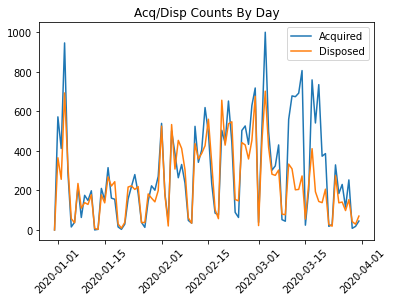

In [8]:
'''
1. Make dataframe where all 'Transaction Date' entries are within the range: [Dec. 31, 2019, Mar. 31 2020] (12 weeks)
2. google 'make list of dates in certain range python' and do that with the range from above ^^^^^^^
3. fill acquired/disposed_list with count of A/D in result of 1 that fall within the ranges of date_range
4. Plot it
'''
start_date = datetime.datetime(year=2019,month=12,day=31)
end_date = datetime.datetime(year=2020,month=3,day=31)
num_periods = 92
temp = data[(data['Transaction Date'] >= start_date) & (data['Transaction Date'] <= end_date)]
date_range = pd.date_range(start=start_date,end=end_date,periods=num_periods)

acquired_list = [0]
disposed_list = [0]
for i in range(1,len(date_range)):
    acq_val = temp[(temp['Transaction Date'] >= date_range[i-1]) & (temp['Transaction Date'] < date_range[i]) & (temp['Acquired or Disposed']=='A')]['link'].shape[0]
    acquired_list.append(acq_val)
    dis_val = temp[(temp['Transaction Date'] >= date_range[i-1]) & (temp['Transaction Date'] < date_range[i]) & (temp['Acquired or Disposed']=='D')]['link'].shape[0]
    disposed_list.append(dis_val)

plt.plot(date_range,acquired_list)
plt.plot(date_range,disposed_list)
plt.xticks(rotation=45)
plt.legend(['Acquired','Disposed'])
plt.title('Acq/Disp Counts By Day')
plt.show()